# Import required libraries and Importing dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
data = pd.read_csv('WalmartProducts.csv')

# Dataset overview

In [ ]:
data.head()

,index,Uniq Id,Crawl Timestamp,Pageurl,Website,Title,Rating,Review,Reviewer Name,Review Upvotes,Review Downvotes,Verified Purchaser,Recommended Purchase,Review Date,Five Star,Four Star,Three Star,Two Star,One Star
0,0,ee40ad5e6211d47a92fa1962938fad16,2020-03-17 03:37:35 +0000,https://www.walmart.com/reviews/product/15066091,walmart.com,"Sylvania 9"" Portable Dvd Player With Swivel Sc...",5.0,This product works great. It's exactly what I ...,Diane,0,0,No,No,12/4/2018,133.0,58.0,15.0,9.0,34.0
1,1,d10f87c07c206c72b0b5ddbf90541b38,2020-03-27 13:15:01 +0000,https://www.walmart.com/reviews/product/247042233,walmart.com,NaN,1.0,My carrier said this phone had been activated ...,Bren,0,0,No,No,12/21/2018,9.0,0.0,1.0,2.0,8.0
2,2,ef254e936e02a1b2bdaf89dd51b73403,2020-02-17 04:49:37 +0000,https://www.walmart.com/reviews/product/649827918,walmart.com,"VIZIO 65"" Class 4K UHD Quantum SmartCast Smart...",5.0,The picture on this TV is better than any TV I...,Hieronymesque,0,0,Yes,No,12/25/2019,180.0,39.0,5.0,8.0,13.0
3,3,183ab6b4ec58daae79c66d0151400b63,2020-02-17 03:11:54 +0000,https://www.walmart.com/reviews/product/665198047,walmart.com,TSV For Fitbit Charge 3 USB Charging Cradle Wa...,5.0,NaN,D,0,0,No,No,4/2/2019,2.0,3.0,0.0,0.0,0.0
4,4,03628759aaed53a0b9d137bca9991c5d,2020-02-07 01:17:14 +0000,https://www.walmart.com/reviews/product/125301514,walmart.com,AKG K92 Closed-Back Headphones - Stereo - Wire...,5.0,Very well-balanced between the highs and the l...,Dubbsta,52,1,No,No,12/9/2017,9.0,3.0,0.0,0.0,2.0


In [ ]:
data.shape

(30006, 19)

Lets take a look at the columns and their data types.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30006 entries, 0 to 30005
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 30006 non-null  int64  
 1   Uniq Id               30006 non-null  object 
 2   Crawl Timestamp       30006 non-null  object 
 3   Pageurl               30006 non-null  object 
 4   Website               30006 non-null  object 
 5   Title                 24412 non-null  object 
 6   Rating                30006 non-null  float64
 7   Review                25821 non-null  object 
 8   Reviewer Name         28358 non-null  object 
 9   Review Upvotes        30006 non-null  int64  
 10  Review Downvotes      30006 non-null  int64  
 11  Verified Purchaser    30006 non-null  object 
 12  Recommended Purchase  30006 non-null  object 
 13  Review Date           30006 non-null  object 
 14  Five Star             29910 non-null  float64
 15  Four Star          

# Handling Missing Values

In [ ]:
data.isnull().sum()

,0
index,0
Uniq Id,0
Crawl Timestamp,0
Pageurl,0
Website,0
Title,5594
Rating,0
Review,4185
Reviewer Name,1648
Review Upvotes,0


We will get rid of the data with missing Title and Reviews

# Analysing Title

In [ ]:
print('Total number of Records :', len(data['Title']))

print('No. of Null/Empty Titles :',data['Title'].isnull().sum())

print('No. of Non-null Titles : ',(~data['Title'].isnull()).sum())


Total number of Records : 30006
No. of Null/Empty Titles : 5594
No. of Non-null Titles :  24412


In [ ]:
print('No. of Unique Titles : ',data['Title'].nunique())

No. of Unique Titles :  4319


In [ ]:
print('Top 20 most frequent Titles : ')
data['Title'].value_counts()[:20]

Top 20 most frequent Titles : 


,count
Title,
Roku Express Streaming Device (2016 Model),162
Roku 3 Streaming Player,130
Roku Express Streaming Media Player - 3700R (2016 Model),129
"Roku Express+ HD 1080p Streaming Media Player, 3910RW",115
COWIN E7 Active Noise Cancelling Headphones Bluetooth Headphones with Mic Deep Bass Wireless Headphones Over Ear,110
Apple iPad mini 2 16GB WiFi (Refurbished),108
Roku 4400R Roku 4 Streaming Media Player,104
Roku Premiere+ 4K HDR Streaming Player,103
Roku Streaming Stick (3500R) (2014 Model),101


# Analysing Rating

<Axes: xlabel='Rating', ylabel='count'>

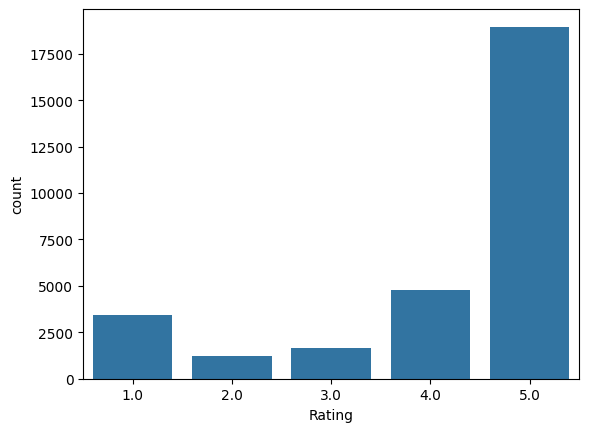

In [ ]:


sns.countplot(x='Rating',data = data)

In [ ]:
print('No. of Reviews with missing "Rating" :',data['Rating'].isnull().sum())

No. of Reviews with missing "Rating" : 0


This shows most of the product are highly rated.

We will delete all the reviews with missing values and remove the columns which will not be required for our analysis.

In [ ]:
# Select relevant columns
df = data[['Title', 'Rating', 'Review', 'Review Date', 'Verified Purchaser', 'Recommended Purchase']]

# Drop rows with no review text
df = df.dropna(subset=['Review'])

# Fill missing product titles
df['Title'] = df['Title'].fillna("Unknown Product")

# Convert Ratings into Sentiment
def get_sentiment(rating):
    if rating >= 4.0:
        return "Positive"
    elif rating == 3.0:
        return "Neutral"
    else:
        return "Negative"

df['Sentiment'] = df['Rating'].apply(get_sentiment)

# Clean review text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = text.lower().strip()
    return text

df['Review'] = df['Review'].apply(clean_text)

# Convert review date to datetime
df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')

# Add Year column
df['Year'] = df['Review Date'].dt.year


In [ ]:
df.head()

,Title,Rating,Review,Review Date,Verified Purchaser,Recommended Purchase,Sentiment,Year
0,"Sylvania 9"" Portable Dvd Player With Swivel Sc...",5.0,this product works great its exactly what i wa...,2018-12-04,No,No,Positive,2018
1,Unknown Product,1.0,my carrier said this phone had been activated ...,2018-12-21,No,No,Negative,2018
2,"VIZIO 65"" Class 4K UHD Quantum SmartCast Smart...",5.0,the picture on this tv is better than any tv i...,2019-12-25,Yes,No,Positive,2019
4,AKG K92 Closed-Back Headphones - Stereo - Wire...,5.0,very wellbalanced between the highs and the lo...,2017-12-09,No,No,Positive,2017
5,Panasonic HD WiFi Camera KX-HN0002B,1.0,i own 6 of these cameras and every one of them...,2018-08-08,No,No,Negative,2018


#  EDA: Rating

<ipython-input-14-e2fefccde6e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


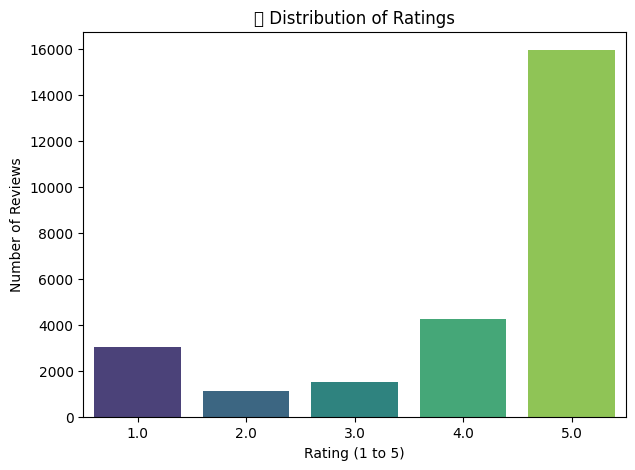

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title("⭐ Distribution of Ratings")
plt.xlabel("Rating (1 to 5)")
plt.ylabel("Number of Reviews")
plt.show()


Most reviews are positive, indicating a happy customer base.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


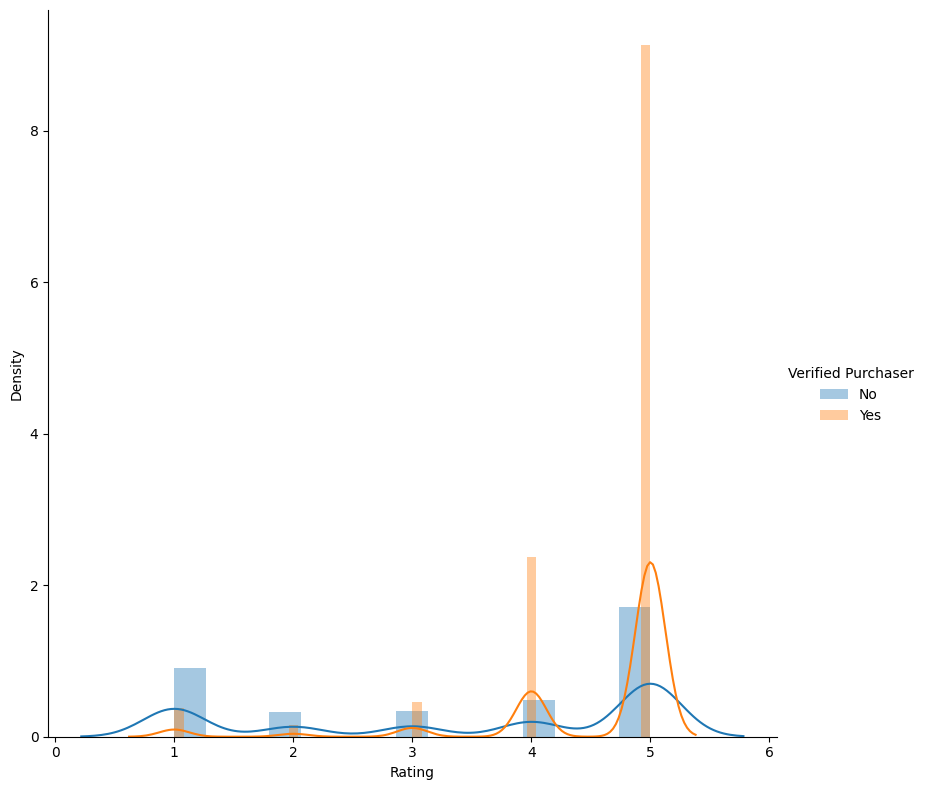

In [ ]:
# Ratings w.r.t 'Verified Purchaser' :

sns.set_style = "Whitegrid";
sns.set_palette = "Set2";
sns.FacetGrid(df, hue="Verified Purchaser", height=8) \
   .map(sns.distplot, "Rating") \
   .add_legend();
plt.show();

Most reviews are fed by verified customer.

<ipython-input-16-32a17d2d6b99>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


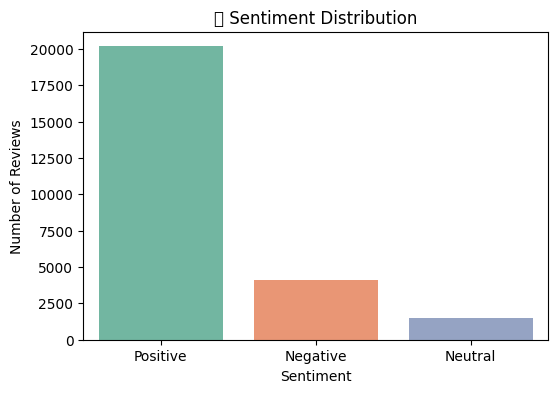

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title("💬 Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


We translated numerical ratings into sentiment. Positive reviews dominate, but there's a significant chunk of negative and neutral feedback to explore.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


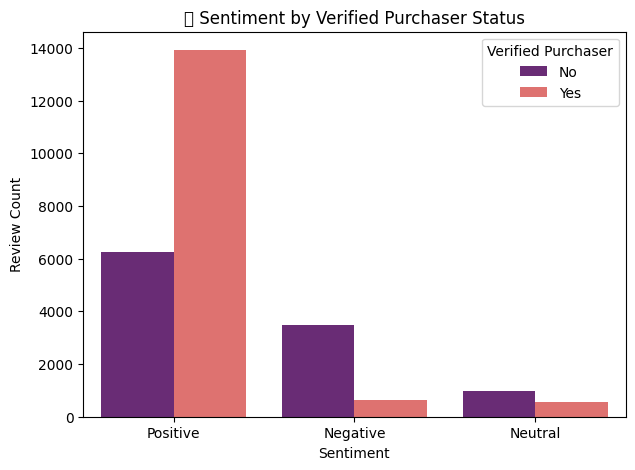

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Sentiment', hue='Verified Purchaser', palette='magma')
plt.title("✅ Sentiment by Verified Purchaser Status")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.legend(title="Verified Purchaser")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


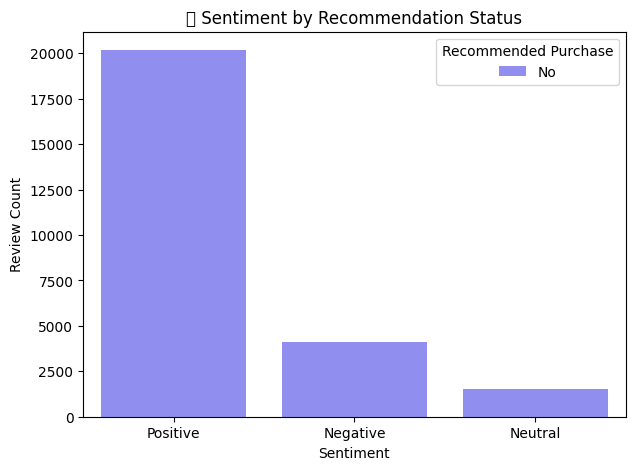

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Sentiment', hue='Recommended Purchase', palette='cool')
plt.title("👍 Sentiment by Recommendation Status")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.legend(title="Recommended Purchase")
plt.show()


Recommended Purchase is not a useful feature, as it has just 1 category.

<ipython-input-19-59d5a5f40cb1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


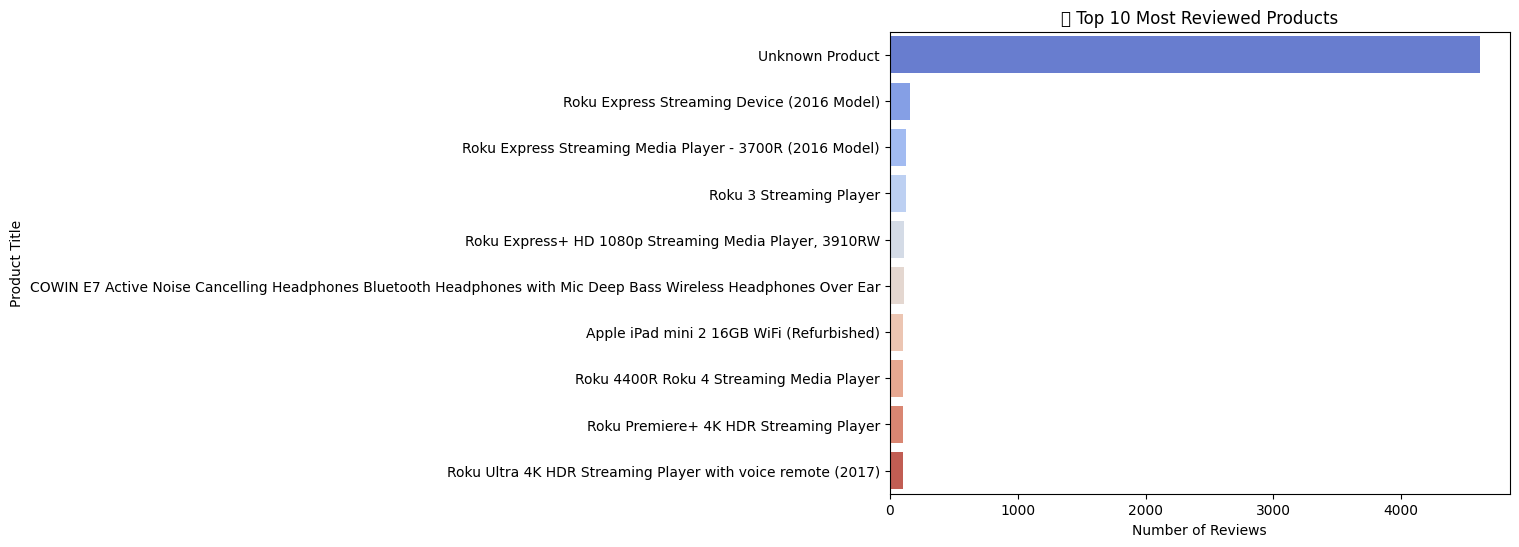

In [ ]:
top_products = df['Title'].value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(y=top_products.index, x=top_products.values, palette='coolwarm')
plt.title("🔥 Top 10 Most Reviewed Products")
plt.xlabel("Number of Reviews")
plt.ylabel("Product Title")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


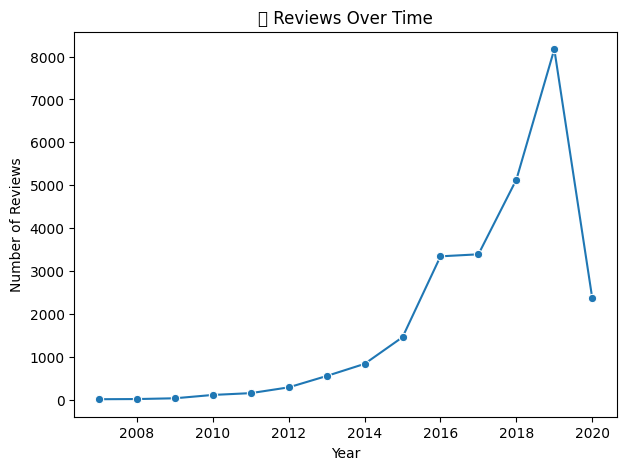

In [ ]:
yearly_reviews = df['Year'].value_counts().sort_index()
plt.figure(figsize=(7,5))
sns.lineplot(x=yearly_reviews.index, y=yearly_reviews.values, marker='o')
plt.title("📈 Reviews Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()

In [ ]:
# Drop rows with missing product title or missing review
df = df.dropna(subset=['Title', 'Review'])

In [ ]:
df.drop('Recommended Purchase', axis=1, inplace=True)

# LLM Fine Tuning

In [ ]:
!pip install transformers datasets evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels into integers
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Sentiment'])

# Display the label mapping
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Sentiment label mapping:", label_map)


Sentiment label mapping: {'Negative': np.int64(0), 'Neutral': np.int64(1), 'Positive': np.int64(2)}


In [ ]:
from datasets import Dataset

# Keep only necessary columns
hf_dataset = Dataset.from_pandas(df[['Review', 'label']])

# Train-test split (80/20)
hf_dataset = hf_dataset.train_test_split(test_size=0.2)

hf_dataset


DatasetDict({
    train: Dataset({
        features: ['Review', 'label', '__index_level_0__'],
        num_rows: 20656
    })
    test: Dataset({
        features: ['Review', 'label', '__index_level_0__'],
        num_rows: 5165
    })
})

# Tokenize the dataset

In [ ]:
from transformers import AutoTokenizer


tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenization function
def tokenize_function(example):
    return tokenizer(
        example["Review"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

# Apply tokenization
tokenized_dataset = hf_dataset.map(tokenize_function, batched=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/20656 [00:00<?, ? examples/s]

Map:   0%|          | 0/5165 [00:00<?, ? examples/s]

In [ ]:
# Set the format for PyTorch
tokenized_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


In [ ]:
from transformers import AutoModelForSequenceClassification

# Load BERT with 3 output labels (Positive, Neutral, Negative)
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
import evaluate

# Define the evaluation metric
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()


<ipython-input-31-0988188f5c32>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sudip-kumar-sengupta (sudip-kumar-sengupta-university-at-buffalo) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,0.300100,0.282081,0.901065
2,0.202100,0.309126,0.901065
3,0.157400,0.366622,0.898161


TrainOutput(global_step=3873, training_loss=0.23368393700774745, metrics={'train_runtime': 1534.239, 'train_samples_per_second': 40.39, 'train_steps_per_second': 2.524, 'total_flos': 4076153067442176.0, 'train_loss': 0.23368393700774745, 'epoch': 3.0})

In [ ]:
trainer.evaluate()


{'eval_loss': 0.28208085894584656,
 'eval_accuracy': 0.9010648596321394,
 'eval_runtime': 38.0197,
 'eval_samples_per_second': 135.85,
 'eval_steps_per_second': 8.496,
 'epoch': 3.0}

In [ ]:
import torch

def predict_sentiment(text):

    device = next(model.parameters()).device

    # Tokenize and move input to model's device
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    # Run model in evaluation mode
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()

    # Map numeric prediction to label
    label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return label_map[predicted_class]


In [ ]:
predict_sentiment("This product was awful and broke in 2 days.")



'Negative'

In [ ]:
predict_sentiment("The quality is decent for the price.")

'Positive'

In [ ]:
predict_sentiment("Absolutely love it! Works like a charm.")

'Positive'

In [ ]:
predict_sentiment("I am not sure whether I will buy it again")

'Negative'

In [ ]:
predict_sentiment("This is not bad")

'Positive'

In [ ]:

def predict_sentiment_with_confidence(text):
    device = next(model.parameters()).device
    model.eval()

    # Tokenize and move to device
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=1).cpu().numpy().flatten()

    # Label mapping
    label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    predicted_label = label_map[np.argmax(probs)]

    # Plot
    plt.figure(figsize=(6, 4))
    plt.bar(label_map.values(), probs, color=['red', 'gray', 'green'])
    plt.title(f"Predicted: {predicted_label}")
    plt.ylabel("Confidence")
    plt.ylim(0, 1)
    plt.show()

    return predicted_label


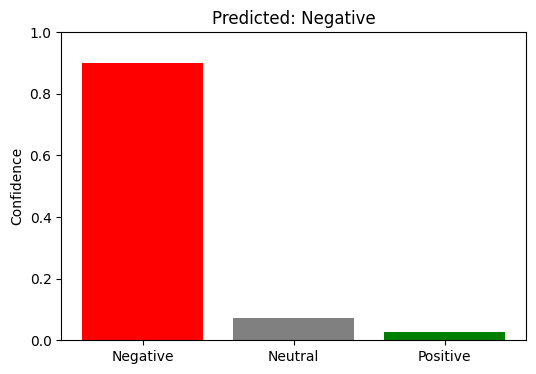

'Negative'

In [ ]:
predict_sentiment_with_confidence("This product is the worst thing I ever bought.")

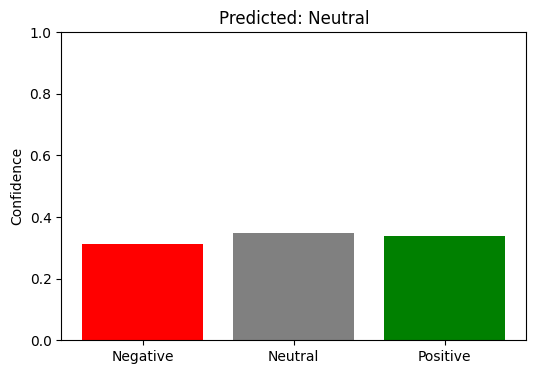

'Neutral'

In [ ]:
predict_sentiment_with_confidence("I think it's okay, not great.")

# Train on Verified Reviewers Only

In [ ]:
df_verified = df[df['Verified Purchaser'] == 'Yes'].copy()

# Drop the Verified Purchaser column now (not needed for model)
df_verified.drop(columns=['Verified Purchaser'], inplace=True)

In [ ]:
# Encode sentiment labels into integers
label_encoder = LabelEncoder()
df_verified['label'] = label_encoder.fit_transform(df_verified['Sentiment'])

# Display the label mapping
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Sentiment label mapping:", label_map)



Sentiment label mapping: {'Negative': np.int64(0), 'Neutral': np.int64(1), 'Positive': np.int64(2)}


In [ ]:
hf_dataset = Dataset.from_pandas(df_verified[['Review', 'label']])

# Train-test split (80/20)
hf_dataset = hf_dataset.train_test_split(test_size=0.2)

hf_dataset

DatasetDict({
    train: Dataset({
        features: ['Review', 'label', '__index_level_0__'],
        num_rows: 12090
    })
    test: Dataset({
        features: ['Review', 'label', '__index_level_0__'],
        num_rows: 3023
    })
})

In [ ]:
from transformers import AutoTokenizer


tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


# Apply tokenization
tokenized_dataset_verified = hf_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/12090 [00:00<?, ? examples/s]

Map:   0%|          | 0/3023 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset_verified.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
trainer_verified = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset_verified["train"],
    eval_dataset=tokenized_dataset_verified["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer_verified.train()


<ipython-input-52-4c3c841aaa48>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_verified = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.169500,0.192476,0.947734
2,0.104100,0.199797,0.951042
3,0.060200,0.226668,0.951042


TrainOutput(global_step=2268, training_loss=0.11139422245126553, metrics={'train_runtime': 892.356, 'train_samples_per_second': 40.645, 'train_steps_per_second': 2.542, 'total_flos': 2385780915248640.0, 'train_loss': 0.11139422245126553, 'epoch': 3.0})

Filtering to only verified reviews significantly improved model accuracy. This suggests that data quality — not just quantity — plays a crucial role in building robust sentiment classification systems. Verified purchasers offer more genuine, consistent feedback that models can learn from effectively